In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('column_2C_weka.csv')
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


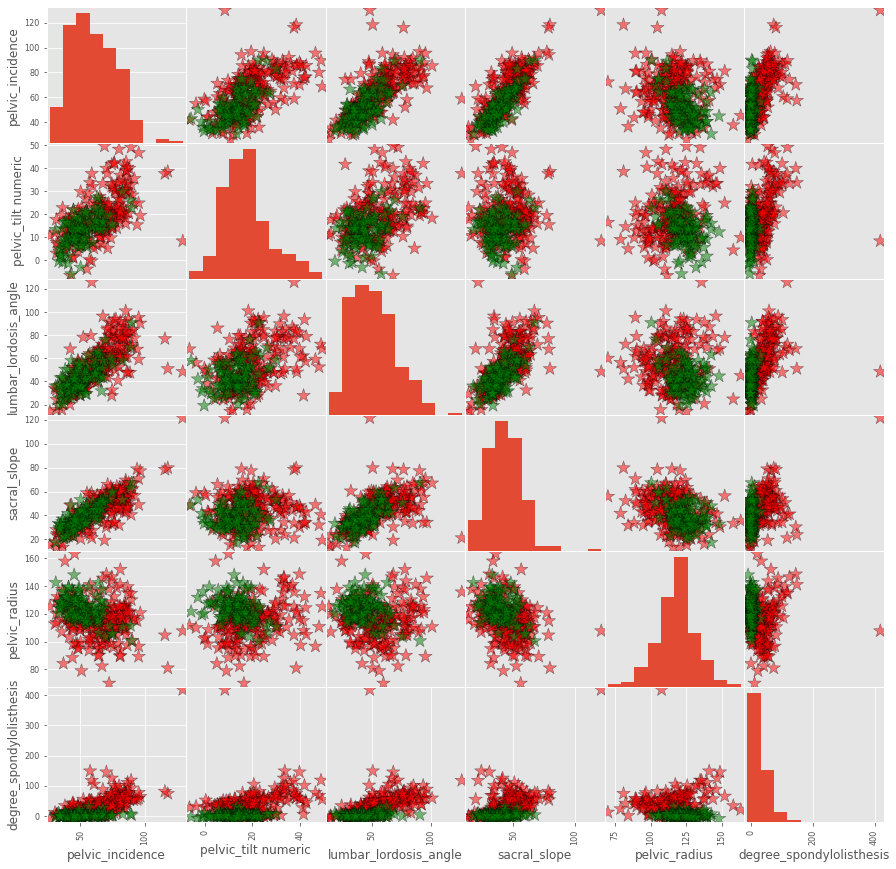

In [5]:
# Plotting scatter matrix
# - green normal, red abnormal

color_list = ['red' if i=='Abnormal' else 'green' for i in df.loc[:, 'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns !='class'], c=color_list, figsize=[15, 15], diagonal='hist', alpha=0.5, s=200, marker='*', edgecolor='black')
plt.show()


Abnormal    210
Normal      100
Name: class, dtype: int64

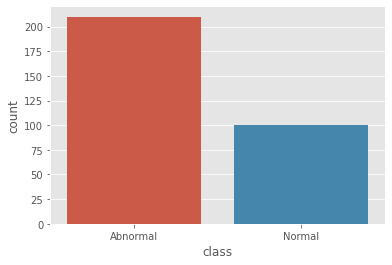

In [6]:
# Countplot() counts number of classes
sns.countplot(x='class', data=df)
df.loc[:, 'class'].value_counts()

In [7]:
# K-nearest neighbors (KNN)
# Look at the closest K-labeled points

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
x, y = df.loc[:, df.columns != 'class'], df.loc[:, 'class']
knn.fit(x, y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [8]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
x, y = df.loc[:, df.columns != 'class'], df.loc[:, 'class']
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ', knn.score(x_test, y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


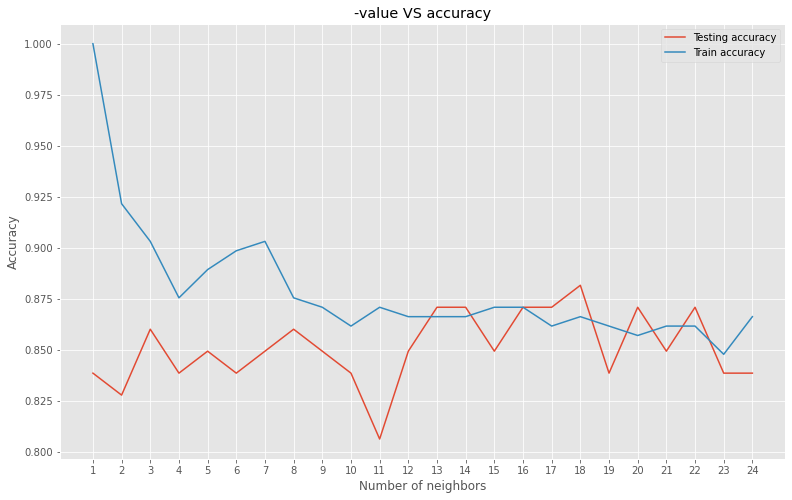

Best accuracy is 0.8817204301075269 witk K = 18


In [9]:
# Model complexity
# K - hyperparameter
# if K is small, model is complex and can lead to overfit
# if K is big, model is less complex  and can lead to underfit

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# loop over different values of K
for i, k in enumerate(neig):
  # k from 1 to 25 (exclude)
  knn = KNeighborsClassifier(n_neighbors=k)
  # fit with knn
  knn.fit(x_train, y_train)
  # train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  # test accuracty
  test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=(13, 8))
plt.plot(neig, test_accuracy, label='Testing accuracy')
plt.plot(neig, train_accuracy, label='Train accuracy')
plt.legend()
plt.title('-value VS accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('train_test_accuracy.png')
plt.show()
print('Best accuracy is {} witk K = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

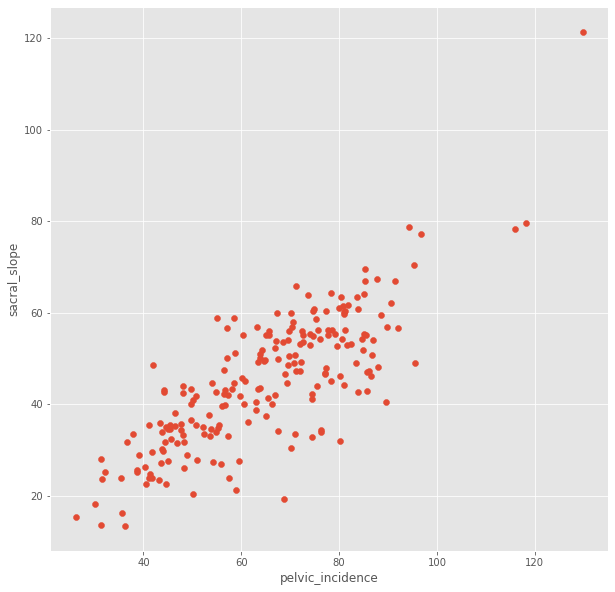

In [10]:
# Regression
# Create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = df[df['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1, 1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1, 1)

plt.figure(figsize=(10, 10))
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


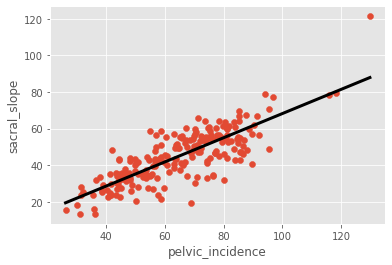

In [11]:
# Linear regression
# y = ax + b where y=target, x=feature and a=parameter of model
# Ordinary Least Square (OLS) - sum all residuals but some positive and negative residuals can cancel each other so we sum square of residuals
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1, 1)
# fit
reg.fit(x, y)
# predict
predicted = reg.predict(predict_space)
# R^2
print('R^2 score: ', reg.score(x, y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [12]:
# Cross validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv=k) # uses R^2 as score
print('CV Scores: ', cv_result)
print('CV Scores average: ', np.sum(cv_result) / k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV Scores average:  0.39314625028848676


In [13]:
# Regularized regression
# In order to avoid overfitting in linear regression, we use regularization that penalizes large coefficients
# Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
# Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))

# Ridge
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ', ridge.score(x_test, y_test))

Ridge score:  0.5608287918841997


In [14]:
# Lasso 
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:, ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.3)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ', lasso.score(x_test, y_test))
print('Lasso coefficients: ', lasso.coef_)

Lasso score:  0.9640334804327546
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


In [15]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x, y = df.loc[:, df.columns != 'class'], df.loc[:, 'class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(random_state=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



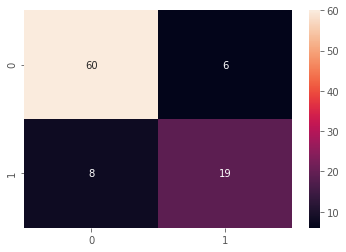

In [16]:
# Visualize with seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

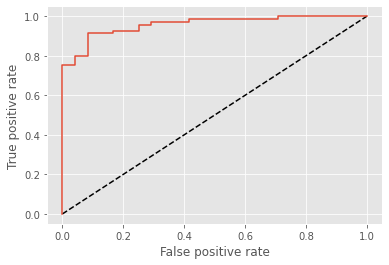

In [17]:
# Receiver Operation Characteristic (ROC) curve with logistic regression
# x-axis is false positive rate and y-axis is true positive rate
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df['class_binary'] = [1 if i == 'Abnormal' else 0 for i in df.loc[:, 'class']]
x, y = df.loc[:, (df.columns != 'class') & (df.columns != 'class_binary')], df.loc[:, 'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


In [18]:
# Hyperparameter tuning
# - try all of combinations of different parameteres
# - fit all of them
# - measure prediction performance
# - see how well each performs
# - finally choose best hyperparameters

In [19]:
# Grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x, y)

print('Tuned hyperparameter k: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


In [20]:
# Greed search cross validation with 2 hyperparameter
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)
logreg_cv.fit(x_train, y_train)

print('Tuned hyperparameters: {}'.format(logreg_cv.best_params_))
print('Best accuracy: {}'.format(logreg_cv.best_score_))

Tuned hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best accuracy: 0.8572425164890919


In [21]:
# Pre-processing data by encoding them to numerical data
df1 = pd.read_csv('column_2C_weka.csv')
df1 = pd.get_dummies(df1)
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0


In [22]:
df1.drop('class_Normal', axis=1, inplace=True)
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [23]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C': [1, 10, 100], 'SVM__gamma':[0.1, 0.01]}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)

print('Accuracy: {}'.format(cv.score(x_test, y_test)))
print('Tuned model parameters: {}'.format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned model parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


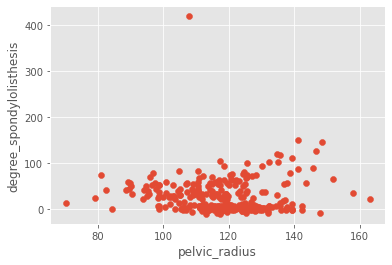

In [24]:
# KMEANS 
# Algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

data = pd.read_csv('column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

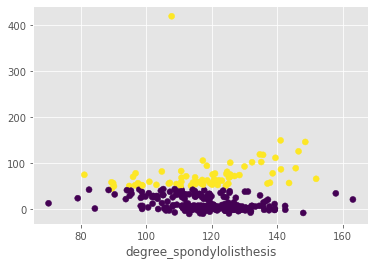

In [25]:
# KMeans clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [26]:
# Evaluating of clustering using cross tabulation table

# There are two clusters 0 and 1
# First class 0 includes 138 abnormal and 100 normal patients
# Second class 1 includes 72 abnormal and 0 normal patients. 
# Majority of two clusters are abnormal patients

# Cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)


class   Abnormal  Normal
labels                  
0            138     100
1             72       0


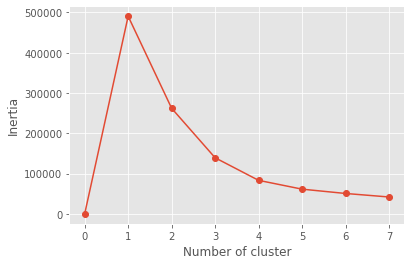

In [27]:
# Inertia - how spread out the clusters are distance from each sample
# Lower inertia means more clusters

inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [28]:
# Standardization - important for both supervised and unsupervised learning
data = pd.read_csv('column_2C_weka.csv')
data3 = data.drop('class', axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            113      10
1             97      90


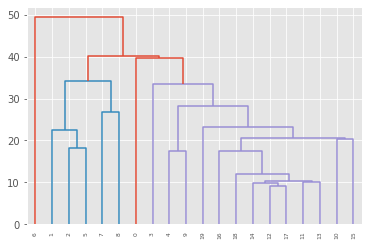

In [31]:
# Hierarchy
# Vertical lines are clusters
# Height on dendogram is a distance between merging cluster

from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data3.iloc[200:220, :], method='single')
dendrogram(merg, leaf_rotation=90, leaf_font_size=6)
plt.show()

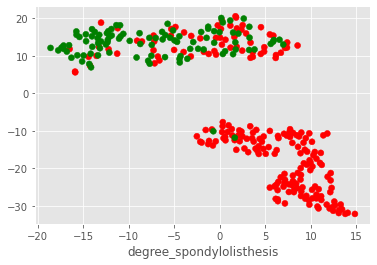

In [32]:
# T - Distributed Stochastic Neighbor Embedding (T - SNE)
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [33]:
# Principal component analysis (PCA)
# Fundamental dimension reduction technique
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930072e-11 -5.77350269e-01
  -3.59059872e-12  3.06729795e-12]]


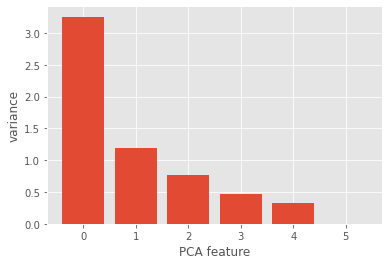

In [34]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

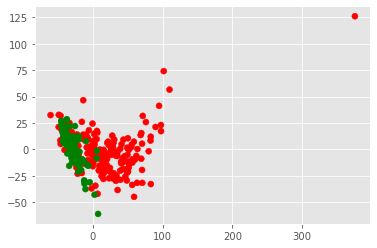

In [35]:
# Apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()